<a href="https://colab.research.google.com/github/dkd99/my-code-practice/blob/main/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch

In [4]:
### Generate some data
torch.manual_seed(7) # Set the random seed so things are predictable

# Features are 3 random normal variables
features = torch.randn((1, 3))
print(features)

# Define the size of each layer in our network
n_input = features.shape[1]     # Number of input units, must match number of input features
print(n_input)

n_hidden = 2                    # Number of hidden units
n_output = 1                    # Number of output units

# Weights for inputs to hidden layer
W1 = torch.randn(n_input, n_hidden)
print(W1)
# Weights for hidden layer to output layer
W2 = torch.randn(n_hidden, n_output)
print(W2)
# and bias terms for hidden and output layers
B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))

tensor([[-0.1468,  0.7861,  0.9468]])
3
tensor([[-1.1143,  1.6908],
        [-0.8948, -0.3556],
        [ 1.2324,  0.1382]])
tensor([[-1.6822],
        [ 0.3177]])


In [5]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

In [6]:
# The MNIST datasets are hosted on yann.lecun.com that has moved under CloudFlare protection
# Run this script to enable the datasets download
# Reference: https://github.com/pytorch/vision/issues/1938

from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [7]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 52350225.19it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1678732.99it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 14349959.84it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7180749.63it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



In [8]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


In [9]:
images[1]

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1

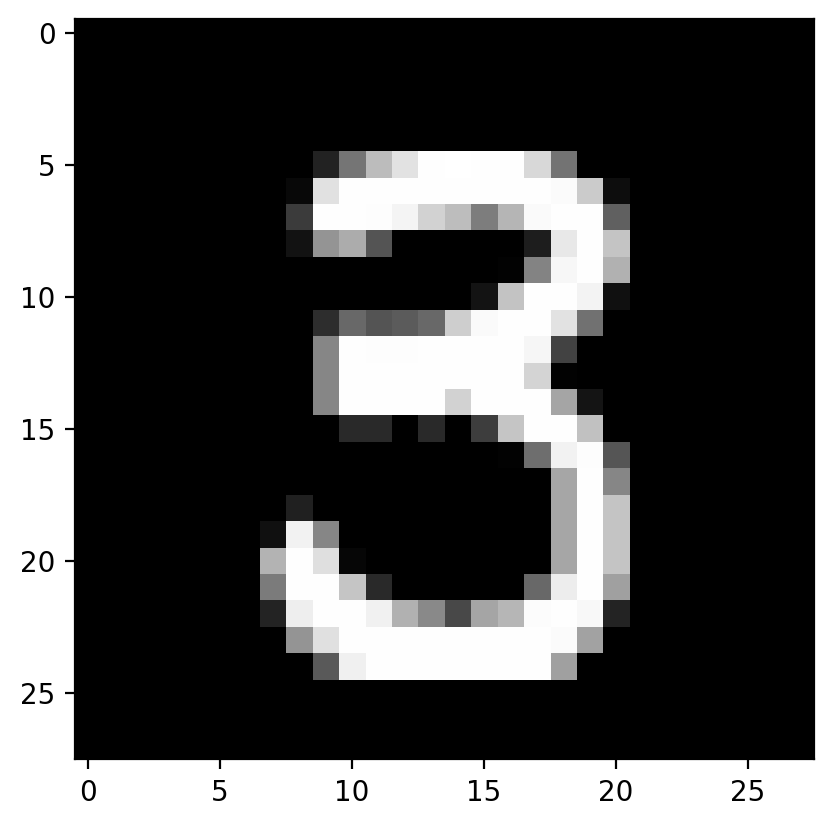

In [10]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');


In [11]:
## Solution
def activation(x):
    return 1/(1+torch.exp(-x))

# Flatten the input images
inputs = images.view(images.shape[0], -1)

# Create parameters
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)

out = activation(torch.mm(h, w2) + b2)

In [12]:
## Solution
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

probabilities = softmax(out)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [13]:
print(probabilities)

tensor([[0.0720, 0.0720, 0.0720, 0.0932, 0.0720, 0.1956, 0.0720, 0.1956, 0.0838,
         0.0720],
        [0.0802, 0.0740, 0.0740, 0.0741, 0.0740, 0.2010, 0.0741, 0.0740, 0.2003,
         0.0744],
        [0.0857, 0.0839, 0.0839, 0.0840, 0.0840, 0.2282, 0.0844, 0.0840, 0.0923,
         0.0895],
        [0.0642, 0.0643, 0.0642, 0.1199, 0.0642, 0.1744, 0.1555, 0.0647, 0.1645,
         0.0642],
        [0.1590, 0.0708, 0.0708, 0.0708, 0.0708, 0.1924, 0.0713, 0.0708, 0.1499,
         0.0735],
        [0.1355, 0.0679, 0.0679, 0.0679, 0.0679, 0.1826, 0.0914, 0.0715, 0.1795,
         0.0679],
        [0.0599, 0.1497, 0.0597, 0.0599, 0.0597, 0.1623, 0.1621, 0.0648, 0.1623,
         0.0597],
        [0.0651, 0.0786, 0.0652, 0.0651, 0.0651, 0.1768, 0.1768, 0.1768, 0.0656,
         0.0650],
        [0.0751, 0.0725, 0.0725, 0.1200, 0.0725, 0.0732, 0.1790, 0.0796, 0.1832,
         0.0725],
        [0.0753, 0.0752, 0.0756, 0.0752, 0.0752, 0.2045, 0.0753, 0.0761, 0.1875,
         0.0800],
        [0

In [14]:
class Parent:
    def __init__(self, name):
        self.name = name

    def greet(self):
        print("Hello,", self.name)

class Child(Parent):
    def __init__(self, name, age):
        super().__init__(name)  # Call parent class constructor
        self.age = age

    def greet(self):
        super().greet()  # Call parent class method
        print("I am", self.age, "years old")

# Create an instance of Child class
child = Child("Alice", 10)

# Call the overridden method in Child class
child.greet()


Hello, Alice
I am 10 years old


In [16]:
from torch import nn
class Network(nn.Module):
    def __init__(self):
        super().__init__()

        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)

        # Define sigmoid activation and softmax output
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)

        return x

In [17]:
# Create the network and look at its text representation
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [18]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)

    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)

        return x

In [19]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Defining the layers, 128, 64, 10 units each
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''

        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)

        return x

model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [20]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[ 0.0303,  0.0047, -0.0060,  ...,  0.0235,  0.0012, -0.0335],
        [ 0.0141,  0.0220,  0.0141,  ..., -0.0081,  0.0335, -0.0211],
        [-0.0301, -0.0065,  0.0150,  ...,  0.0091, -0.0224, -0.0060],
        ...,
        [ 0.0126,  0.0191,  0.0257,  ..., -0.0219,  0.0255, -0.0272],
        [ 0.0334, -0.0019, -0.0155,  ..., -0.0205,  0.0314, -0.0051],
        [-0.0152,  0.0289,  0.0296,  ..., -0.0032,  0.0309,  0.0017]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0203, -0.0101,  0.0036, -0.0251, -0.0256, -0.0087,  0.0092, -0.0355,
         0.0127, -0.0146, -0.0254, -0.0126, -0.0269,  0.0212,  0.0112, -0.0237,
         0.0278,  0.0016, -0.0003,  0.0029, -0.0072,  0.0156,  0.0173, -0.0053,
         0.0148,  0.0055,  0.0167, -0.0079,  0.0071,  0.0239,  0.0309,  0.0081,
         0.0260,  0.0178, -0.0177,  0.0286, -0.0192,  0.0316, -0.0331, -0.0061,
        -0.0203, -0.0219,  0.0069, -0.0191,  0.0133, -0.0211,  0.0017,  0.0135,
        -0.0236

In [21]:
model.fc1.bias.data.fill_(0)


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [22]:
# sample from random normal with standard dev = 0.01
model.fc1.weight.data.normal_(std=0.01)

tensor([[ 0.0044,  0.0075, -0.0091,  ..., -0.0029, -0.0191, -0.0109],
        [-0.0039,  0.0115,  0.0018,  ...,  0.0032, -0.0116,  0.0238],
        [ 0.0001, -0.0048, -0.0022,  ..., -0.0073,  0.0073, -0.0150],
        ...,
        [ 0.0003, -0.0006,  0.0089,  ..., -0.0065,  0.0105, -0.0093],
        [ 0.0069, -0.0074,  0.0049,  ..., -0.0027,  0.0132,  0.0289],
        [ 0.0017,  0.0128, -0.0048,  ..., -0.0103, -0.0042, -0.0028]])

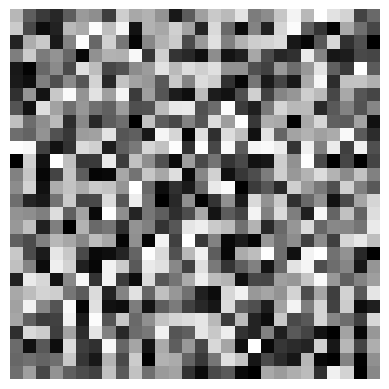

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create a random 1x28x28 array
array = np.random.rand(1, 28, 28)

# Plot the array as an image
plt.imshow(array[0], cmap='gray')
plt.axis('off')
plt.show()


In [2]:
import numpy as np

# Create a NumPy array of size 4x3x2 filled with zeros
array = np.zeros((4, 3, 2))

print("Shape of the array:", array.shape)
print("Array:")
print(array)


Shape of the array: (4, 3, 2)
Array:
[[[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]]


In [ ]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1, 28, 28), ps)

In [24]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1, 28, 28), ps)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


AttributeError: module 'helper' has no attribute 'view_classify'

In [25]:
# The MNIST datasets are hosted on yann.lecun.com that has moved under CloudFlare protection
# Run this script to enable the datasets download
# Reference: https://github.com/pytorch/vision/issues/1938

from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [26]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [27]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))

# Define the loss
criterion = nn.CrossEntropyLoss()

# Get our data
dataiter = iter(trainloader)

images, labels = next(dataiter)

# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.2966, grad_fn=<NllLossBackward0>)


In [29]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [30]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        # TODO: Training pass
        optimizer.zero_grad()

        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.9400520999548532
Training loss: 0.8874037231781335
Training loss: 0.5317959228494783
Training loss: 0.4323979470013047
Training loss: 0.3868062428192798


In [31]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 0.0001, -0.0288, -0.0062,  ..., -0.0169, -0.0017,  0.0285],
        [ 0.0041,  0.0040, -0.0233,  ..., -0.0181, -0.0032, -0.0031],
        [ 0.0282, -0.0175, -0.0279,  ..., -0.0106, -0.0027, -0.0061],
        ...,
        [ 0.0093, -0.0050, -0.0328,  ..., -0.0369, -0.0248,  0.0100],
        [-0.0066,  0.0038,  0.0043,  ..., -0.0018,  0.0162,  0.0239],
        [-0.0136, -0.0143,  0.0085,  ..., -0.0325, -0.0045,  0.0330]],
       requires_grad=True)
Gradient - tensor([[ 0.0027,  0.0027,  0.0027,  ...,  0.0027,  0.0027,  0.0027],
        [ 0.0024,  0.0024,  0.0024,  ...,  0.0024,  0.0024,  0.0024],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [-0.0071, -0.0071, -0.0071,  ..., -0.0071, -0.0071, -0.0071],
        [-0.0049, -0.0049, -0.0049,  ..., -0.0049, -0.0049, -0.0049],
        [ 0.0073,  0.0073,  0.0073,  ...,  0.0073,  0.0073,  0.0073]])


In [32]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 9.4071e-05, -2.8840e-02, -6.1946e-03,  ..., -1.6863e-02,
         -1.7512e-03,  2.8479e-02],
        [ 4.1412e-03,  4.0395e-03, -2.3282e-02,  ..., -1.8108e-02,
         -3.1764e-03, -3.1053e-03],
        [ 2.8208e-02, -1.7469e-02, -2.7925e-02,  ..., -1.0593e-02,
         -2.6703e-03, -6.0650e-03],
        ...,
        [ 9.3706e-03, -5.0282e-03, -3.2774e-02,  ..., -3.6886e-02,
         -2.4774e-02,  1.0050e-02],
        [-6.6031e-03,  3.7772e-03,  4.2851e-03,  ..., -1.7616e-03,
          1.6222e-02,  2.3887e-02],
        [-1.3644e-02, -1.4296e-02,  8.4485e-03,  ..., -3.2509e-02,
         -4.5189e-03,  3.2969e-02]], requires_grad=True)


In [34]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
#helper.view_classify(img.view(1, 28, 28), ps)